In [1]:
## 1. Import Libraries

# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# For plots to be visible in the notebook
%matplotlib inline

In [2]:
## 2. Load the Data

# Define column names based on the provided description
columns = ['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholesterol', 
           'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 
           'exercise_angina', 'oldpeak', 'st_slope', 'target']

# Load the data - update the file path to your actual data file
file_path = 'heart_disease_data.csv'

try:
    # Try to load the data with different header settings
    try:
        # First try with header=0 (assuming file has header row)
        df = pd.read_csv(file_path, header=0)
        print(f"Data loaded with header row: {df.shape[0]} rows and {df.shape[1]} columns")
        
        # Check if we need to rename columns
        if set(df.columns) != set(columns):
            df.columns = columns
            print("Column names updated")
            
    except:
        # If that fails, try with no header
        df = pd.read_csv(file_path, names=columns, header=None)
        print(f"Data loaded without header row: {df.shape[0]} rows and {df.shape[1]} columns")
    
    # Make sure data is numeric (convert if needed)
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = pd.to_numeric(df[col])
                print(f"Converted column {col} to numeric")
            except:
                print(f"Warning: Could not convert column {col} to numeric")
                
except FileNotFoundError:
    print(f"File not found: {file_path}")
    print("Creating sample dataset for demonstration")
    
    # Create a simple sample dataset
    np.random.seed(42)
    n_samples = 100
    
    data = {
        'age': np.random.randint(30, 80, n_samples),
        'sex': np.random.randint(0, 2, n_samples),
        'chest_pain_type': np.random.randint(1, 5, n_samples),
        'resting_bp': np.random.randint(90, 200, n_samples),
        'cholesterol': np.random.randint(120, 570, n_samples),
        'fasting_blood_sugar': np.random.randint(0, 2, n_samples),
        'resting_ecg': np.random.randint(0, 3, n_samples),
        'max_heart_rate': np.random.randint(70, 210, n_samples),
        'exercise_angina': np.random.randint(0, 2, n_samples),
        'oldpeak': np.round(np.random.uniform(0, 6, n_samples), 1),
        'st_slope': np.random.randint(1, 4, n_samples),
        'target': np.random.randint(0, 2, n_samples)
    }
    
    df = pd.DataFrame(data)

Data loaded with header row: 1190 rows and 12 columns
Column names updated


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest_pain_type      1190 non-null   int64  
 3   resting_bp           1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting_blood_sugar  1190 non-null   int64  
 6   resting_ecg          1190 non-null   int64  
 7   max_heart_rate       1190 non-null   int64  
 8   exercise_angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  st_slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB

Missing values:
age                    0
sex                    0
chest_pain_type        0
resting_bp             0
cholesterol            

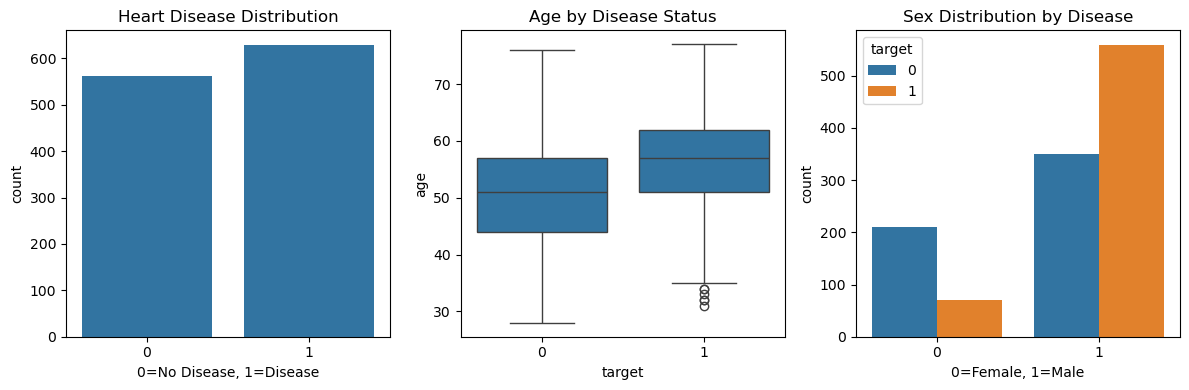

In [3]:
## 3. Quick Data Exploration

# Display the first few rows of the dataset
df.head()

# Check basic info and missing values
df.info()
print("\nMissing values:")
print(df.isnull().sum())

# Target distribution
print("\nTarget distribution:")
print(df['target'].value_counts())

# Basic visualizations
plt.figure(figsize=(12, 4))

# Plot 1: Target distribution
plt.subplot(1, 3, 1)
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution')
plt.xlabel('0=No Disease, 1=Disease')

# Plot 2: Age by target
plt.subplot(1, 3, 2)
sns.boxplot(x='target', y='age', data=df)
plt.title('Age by Disease Status')

# Plot 3: Sex by target
plt.subplot(1, 3, 3)
sns.countplot(x='sex', hue='target', data=df)
plt.title('Sex Distribution by Disease')
plt.xlabel('0=Female, 1=Male')
plt.tight_layout()
plt.show()

In [4]:
## 4. Data Preprocessing

# Check data types before proceeding
print("\nData types of each column:")
print(df.dtypes)

# Handle any missing values
if df.isnull().sum().any():
    print("Filling missing values...")
    df = df.fillna(df.median())

# Make sure all data is numeric before proceeding
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    except:
        print(f"Warning: Issues with column {col}")

# Drop any rows with NaN values that might have been introduced during conversion
if df.isnull().sum().any():
    print("Dropping rows with invalid values after conversion...")
    df = df.dropna()
    print(f"Remaining rows: {df.shape[0]}")

# Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# Scale the features
print("Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Scaling complete")


Data types of each column:
age                      int64
sex                      int64
chest_pain_type          int64
resting_bp               int64
cholesterol              int64
fasting_blood_sugar      int64
resting_ecg              int64
max_heart_rate           int64
exercise_angina          int64
oldpeak                float64
st_slope                 int64
target                   int64
dtype: object
Training samples: 833
Testing samples: 357
Scaling features...
Scaling complete


In [5]:
## 5. Train the Model

# Create and train the Random Forest model
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

# Train the model
model.fit(X_train_scaled, y_train)
print("Model trained successfully!")

Model trained successfully!


Accuracy: 0.9216

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       154
           1       0.94      0.93      0.93       203

    accuracy                           0.92       357
   macro avg       0.92      0.92      0.92       357
weighted avg       0.92      0.92      0.92       357



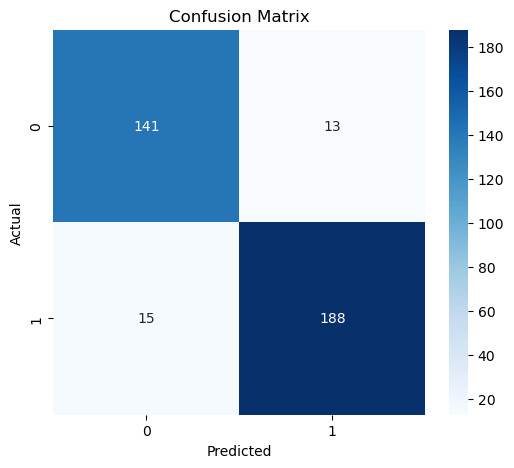

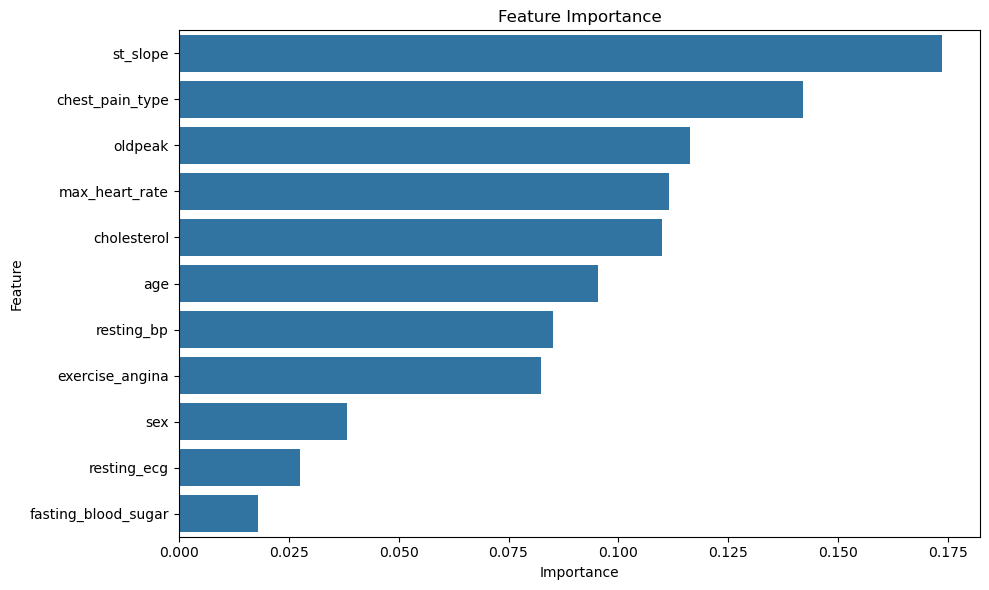

Top 5 most important features:
            Feature  Importance
10         st_slope    0.173561
2   chest_pain_type    0.142042
9           oldpeak    0.116258
7    max_heart_rate    0.111510
4       cholesterol    0.109818


In [6]:
## 6. Evaluate the Model

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

print("Top 5 most important features:")
print(importance_df.head())

In [7]:
## 7. Save the Model

# Save the model and scaler
joblib.dump(model, 'heart_disease_model.pkl')
joblib.dump(scaler, 'heart_disease_scaler.pkl')
print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [10]:
## 8. Make Predictions on New Data

def predict_heart_disease(model, scaler, patient_data):
    """Make heart disease predictions for new patient data"""
    # Scale the data
    scaled_data = scaler.transform(patient_data)
    
    # Make prediction
    predictions = model.predict(scaled_data)
    probabilities = model.predict_proba(scaled_data)[:, 1]
    
    # Create results dataframe
    results = pd.DataFrame({
        'Patient': range(1, len(patient_data) + 1),
        'Prediction': ['Heart Disease' if p == 1 else 'Normal' for p in predictions],
        'Probability': probabilities,
        'Risk Level': ['High' if p >= 0.7 else 'Medium' if p >= 0.3 else 'Low' for p in probabilities]
    })
    
    return results

# Sample patients for demonstration
sample_patients = pd.DataFrame({
    'age': [65, 45],
    'sex': [1, 0],  # 1=Male, 0=Female
    'chest_pain_type': [4, 1],
    'resting_bp': [160, 120],
    'cholesterol': [280, 200],
    'fasting_blood_sugar': [1, 0],
    'resting_ecg': [2, 0],
    'max_heart_rate': [120, 170],
    'exercise_angina': [1, 0],
    'oldpeak': [2.5, 0.0],
    'st_slope': [2, 1]
})

print("Sample patients:")
display(sample_patients)

# Get predictions
results = predict_heart_disease(model, scaler, sample_patients)
print("\nPrediction results:")
display(results)

Sample patients:


,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope
0,65,1,4,160,280,1,2,120,1,2.5,2
1,45,0,1,120,200,0,0,170,0,0.0,1



Prediction results:


,Patient,Prediction,Probability,Risk Level
0,1,Heart Disease,0.998507,High
1,2,Normal,0.010362,Low


In [9]:
# Try your own patient data
# Replace these values with your patient's information
my_patient = pd.DataFrame({
    'age': [50],
    'sex': [1],  # 1=Male, 0=Female
    'chest_pain_type': [3],
    'resting_bp': [140],
    'cholesterol': [250],
    'fasting_blood_sugar': [0],
    'resting_ecg': [1],
    'max_heart_rate': [150],
    'exercise_angina': [0],
    'oldpeak': [1.0],
    'st_slope': [2]
})

print("Your patient data:")
display(my_patient)

# Make prediction
my_result = predict_heart_disease(model, scaler, my_patient)
print("\nPrediction result:")
display(my_result)

Your patient data:


,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope
0,50,1,3,140,250,0,1,150,0,1.0,2



Prediction result:


,Patient,Prediction,Probability,Risk Level
0,1,Normal,0.498057,Medium
